In [2]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, rcParams

import geopandas as gpd
import os
import warnings
from datetime import datetime
import numpy as np

warnings.simplefilter("ignore")

font_path = r'C:/Users/user/NanumFontSetup_TTF_ALL/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path, size=18).get_name()
rc('font',family=font_name)

In [3]:
path = r'C:/Data Analysis/부평구 상권분석/data/아파트 거래내역/'
print(os.listdir(path))

['아파트(매매)_실거래가(2017년도).xlsx', '아파트(매매)_실거래가(2018년도).xlsx', '아파트(매매)_실거래가(2019년도).xlsx']


In [130]:
pd.set_option('display.max_rows', 10)

In [42]:
data_list = []
data_name_list = os.listdir(path)
for data_name in data_name_list:
    data = pd.read_excel(path+data_name)
    data.columns = data.iloc[15].values
    data.drop(range(16),axis=0,inplace=True)
    data_list.append(data) 
    display(data.head(10))

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일
16,인천광역시 부평구 갈산동,183-1,0183,0001,갈산,38.295,201706,2,"12,400",4,1986,굴포로5번길 28,NaN
17,인천광역시 부평구 갈산동,183-1,0183,0001,갈산,38.295,201706,21,"12,300",2,1986,굴포로5번길 28,NaN
18,인천광역시 부평구 갈산동,183-1,0183,0001,갈산,38.295,201709,19,"12,600",4,1986,굴포로5번길 28,NaN
19,인천광역시 부평구 갈산동,183-1,0183,0001,갈산,44.415,201711,22,"12,400",5,1986,굴포로5번길 28,NaN
20,인천광역시 부평구 갈산동,361-4,0361,0004,대동1,106.62,201703,9,"32,450",8,1992,주부토로 193,NaN
21,인천광역시 부평구 갈산동,361-4,0361,0004,대동1,106.62,201703,16,"33,000",4,1992,주부토로 193,NaN
22,인천광역시 부평구 갈산동,361-4,0361,0004,대동1,125.07,201703,20,"35,100",11,1992,주부토로 193,NaN
23,인천광역시 부평구 갈산동,361-4,0361,0004,대동1,106.62,201704,3,"31,000",6,1992,주부토로 193,NaN
24,인천광역시 부평구 갈산동,361-4,0361,0004,대동1,125.07,201704,8,"34,000",3,1992,주부토로 193,NaN
25,인천광역시 부평구 갈산동,361-4,0361,0004,대동1,139.41,201704,8,"33,750",2,1992,주부토로 193,NaN


,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일
16,인천광역시 부평구 갈산동,183-1,0183,0001,갈산,38.295,201803,5,"12,300",1,1986,굴포로5번길 28,NaN
17,인천광역시 부평구 갈산동,183-1,0183,0001,갈산,44.415,201805,26,"13,400",1,1986,굴포로5번길 28,NaN
18,인천광역시 부평구 갈산동,183-1,0183,0001,갈산,44.415,201807,22,"13,900",3,1986,굴포로5번길 28,NaN
19,인천광역시 부평구 갈산동,183-1,0183,0001,갈산,44.415,201809,3,"14,000",3,1986,굴포로5번길 28,NaN
20,인천광역시 부평구 갈산동,183-1,0183,0001,갈산,44.415,201810,22,"14,250",2,1986,굴포로5번길 28,NaN
21,인천광역시 부평구 갈산동,361-4,0361,0004,대동1,106.62,201802,13,"31,500",12,1992,주부토로 193,NaN
22,인천광역시 부평구 갈산동,361-4,0361,0004,대동1,106.62,201802,19,"30,500",13,1992,주부토로 193,NaN
23,인천광역시 부평구 갈산동,361-4,0361,0004,대동1,125.07,201802,28,"31,500",15,1992,주부토로 193,NaN
24,인천광역시 부평구 갈산동,361-4,0361,0004,대동1,106.62,201805,29,"32,000",6,1992,주부토로 193,NaN
25,인천광역시 부평구 갈산동,361-4,0361,0004,대동1,125.07,201805,31,"32,300",8,1992,주부토로 193,NaN


,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일
16,인천광역시 부평구 갈산동,183-1,0183,0001,갈산,44.415,201905,11,"12,900",4,1986,굴포로5번길 28,NaN
17,인천광역시 부평구 갈산동,183-1,0183,0001,갈산,38.295,201906,25,"11,000",5,1986,굴포로5번길 28,NaN
18,인천광역시 부평구 갈산동,183-1,0183,0001,갈산,44.415,201907,30,"12,500",5,1986,굴포로5번길 28,NaN
19,인천광역시 부평구 갈산동,183-1,0183,0001,갈산,44.415,201909,24,"15,100",4,1986,굴포로5번길 28,NaN
20,인천광역시 부평구 갈산동,183-1,0183,0001,갈산,44.415,201909,24,"12,500",5,1986,굴포로5번길 28,NaN
21,인천광역시 부평구 갈산동,183-1,0183,0001,갈산,44.415,201910,15,"15,000",3,1986,굴포로5번길 28,NaN
22,인천광역시 부평구 갈산동,183-1,0183,0001,갈산,38.295,201910,18,"12,200",1,1986,굴포로5번길 28,NaN
23,인천광역시 부평구 갈산동,183-1,0183,0001,갈산,38.295,201911,6,"12,000",2,1986,굴포로5번길 28,NaN
24,인천광역시 부평구 갈산동,183-1,0183,0001,갈산,38.295,201911,30,"12,500",3,1986,굴포로5번길 28,NaN
25,인천광역시 부평구 갈산동,183-1,0183,0001,갈산,38.295,201912,2,"12,000",2,1986,굴포로5번길 28,NaN


In [239]:
Int_data = pd.concat(data_list)
Int_data.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19751 entries, 16 to 6826
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시군구       19751 non-null  object
 1   번지        19751 non-null  object
 2   본번        19751 non-null  object
 3   부번        19751 non-null  object
 4   단지명       19751 non-null  object
 5   전용면적(㎡)   19751 non-null  object
 6   계약년월      19751 non-null  object
 7   계약일       19751 non-null  object
 8   거래금액(만원)  19751 non-null  object
 9   층         19751 non-null  object
 10  건축년도      19751 non-null  object
 11  도로명       19751 non-null  object
 12  해제사유발생일   0 non-null      object
dtypes: object(13)
memory usage: 2.1+ MB


# 1. Column 생성

In [240]:
essential_col = ['시군구','번지','단지명','계약년월','거래금액(만원)','도로명']

extract_data = Int_data[essential_col]
extract_data.rename(columns={'거래금액(만원)':'거래금액'},inplace=True)
extract_data['옛날주소'] = extract_data['시군구']+' '+extract_data['번지']
extract_data['계약년월'] = [datetime.strptime(date,"%Y%M") for date in extract_data['계약년월']]
extract_data['계약연도'] = [date.year for date in extract_data['계약년월']] # 계약연도 추출
extract_data['계약월'] = [date.month for date in extract_data['계약년월']] # 계약월 추출
extract_data['거래금액'] = [row.replace(",","").strip() for row in extract_data['거래금액']] # 공백 제거
extract_data['거래금액']= extract_data['거래금액'].astype(int) # str to int형으로 타입 변환
extract_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19751 entries, 16 to 6826
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   시군구     19751 non-null  object        
 1   번지      19751 non-null  object        
 2   단지명     19751 non-null  object        
 3   계약년월    19751 non-null  datetime64[ns]
 4   거래금액    19751 non-null  int32         
 5   도로명     19751 non-null  object        
 6   옛날주소    19751 non-null  object        
 7   계약연도    19751 non-null  int64         
 8   계약월     19751 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(2), object(5)
memory usage: 1.4+ MB


In [241]:
# use_data = extract_data.groupby(['옛날주소','계약연도','계약월'])['거래금액'].mean().to_frame().reset_index()
use_data = pd.pivot_table(extract_data,values='거래금액',index=['옛날주소'],columns=['계약연도'],aggfunc='mean')
# use_data['거래금액']= round(use_data['거래금액'],2)
use_data.reset_index(inplace=True)

In [242]:
use_data.shape

(440, 4)

# 2. 결측치 채우기

In [243]:
use_data.head()

계약연도,옛날주소,2017,2018,2019
0,인천광역시 부평구 갈산동 159,30771.428571,30115.909091,30061.031250
1,인천광역시 부평구 갈산동 161,NaN,33000.000000,NaN
2,인천광역시 부평구 갈산동 171-5,13194.000000,13700.000000,16159.090909
3,인천광역시 부평구 갈산동 179-1,24918.965517,24800.000000,25557.407407
4,인천광역시 부평구 갈산동 181-11,15780.000000,16456.250000,17211.111111


In [245]:
use_data.isnull().sum()

계약연도
옛날주소     0
2017    74
2018    60
2019    61
dtype: int64

In [246]:
# 공백값 3개년도 평균으로 채워넣는다.
for idx, row in use_data.iterrows():
    if row.isnull().any():
        use_data.iloc[idx] = use_data.iloc[idx].fillna(row.iloc[1:].mean())

use_data.isnull().sum()

계약연도
옛날주소    0
2017    0
2018    0
2019    0
dtype: int64

In [248]:
use_data['차분평균'] = [ round(np.diff(list(row[1:])).mean(),3) for idx, row in use_data.iterrows()]
use_data.head()

계약연도,옛날주소,2017,2018,2019,차분평균
0,인천광역시 부평구 갈산동 159,30771.428571,30115.909091,30061.031250,-355.199
1,인천광역시 부평구 갈산동 161,33000.000000,33000.000000,33000.000000,0.000
2,인천광역시 부평구 갈산동 171-5,13194.000000,13700.000000,16159.090909,1482.545
3,인천광역시 부평구 갈산동 179-1,24918.965517,24800.000000,25557.407407,319.221
4,인천광역시 부평구 갈산동 181-11,15780.000000,16456.250000,17211.111111,715.556


In [ ]:
use_data.to_csv('./data/전처리 파일/아파트시세/아파트시세_데이터.csv')

# 3. 아파트 위치정보 결합

In [ ]:
pos_data = pd.read_csv('./data/전처리 파일/아파트시세/아파트 위경도.csv')
pos_data.head()

In [251]:
use_data_with_pos = use_data.merge(pos_data,how='inner',right_on='address',left_on='옛날주소')
use_data_with_pos.drop('address',axis=1,inplace=True)
use_data_with_pos.head()

,옛날주소,2017,2018,2019,차분평균,latitude,longitude
0,인천광역시 부평구 갈산동 159,30771.428571,30115.909091,30061.031250,-355.199,37.517580,126.723149
1,인천광역시 부평구 갈산동 161,33000.000000,33000.000000,33000.000000,0.000,37.518211,126.723990
2,인천광역시 부평구 갈산동 171-5,13194.000000,13700.000000,16159.090909,1482.545,37.515711,126.725077
3,인천광역시 부평구 갈산동 179-1,24918.965517,24800.000000,25557.407407,319.221,37.514746,126.724028
4,인천광역시 부평구 갈산동 181-11,15780.000000,16456.250000,17211.111111,715.556,37.515431,126.721945


In [252]:
use_data_with_pos.to_csv('./data/전처리 파일/아파트시세/아파트시세_집계데이터(위치포함).csv')

# 4. 기초구역별 아파트 시세 정보 로딩

In [253]:
apart_with_area = gpd.read_file('./data/전처리 파일/아파트시세/기초구역별_아파트시세_5181.shp')
apart_with_area.head()

,BAS_AR,BAS_ID,BAS_MGT_SN,CTP_KOR_NM,MVMN_DE,MVMN_RESN,NTFC_DE,OPERT_DE,SIG_CD,SIG_KOR_NM,field_1,옛날주소,2017,2018,2019,차분평균,latitude,longitude,geometry
0,2.648838,21459,2823700025,인천광역시,None,None,20121221,None,28237,부평구,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((176641.304 442645.152, 176647.527 44..."
1,0.156212,21384,2823700061,인천광역시,None,None,20121221,None,28237,부평구,341.0,인천광역시 부평구 산곡동 307,25859.842105,26445.19084,26884.779412,512.469,37.489994,126.706784,"POLYGON ((174332.882 443549.806, 174341.717 44..."
2,0.076024,21403,2823700058,인천광역시,None,None,20121221,None,28237,부평구,108.0,인천광역시 부평구 부평동 161-12,8600.000000,8040.00000,9678.571429,539.286,37.489565,126.729907,"POLYGON ((176460.207 443392.656, 176503.040 44..."
3,0.076024,21403,2823700058,인천광역시,None,None,20121221,None,28237,부평구,238.0,인천광역시 부평구 부평동 495-10,18000.000000,18575.00000,19150.000000,575.000,37.490155,126.731765,"POLYGON ((176460.207 443392.656, 176503.040 44..."
4,0.076024,21403,2823700058,인천광역시,None,None,20121221,None,28237,부평구,239.0,인천광역시 부평구 부평동 495-2,15700.000000,15700.00000,15700.000000,0.000,37.490079,126.731998,"POLYGON ((176460.207 443392.656, 176503.040 44..."


In [254]:
apart_with_area.isnull().sum()

BAS_AR          0
BAS_ID          0
BAS_MGT_SN      0
CTP_KOR_NM      0
MVMN_DE       487
             ... 
2019           47
차분평균           47
latitude       47
longitude      47
geometry        0
Length: 19, dtype: int64

In [271]:
essential_col = ['BAS_ID','차분평균','geometry']

geo_data = apart_with_area.drop_duplicates('BAS_ID')
geo_data = geo_data[['BAS_ID','geometry']]

apart_data_with_area = apart_with_area[essential_col]
apart_data_with_area = apart_data_with_area.groupby('BAS_ID',group_keys=False)['차분평균'].mean().to_frame()
apart_data_with_area.fillna(0,inplace=True)
apart_data_with_area.isnull().sum()

차분평균    0
dtype: int64

In [272]:
result = apart_data_with_area.merge(geo_data,how='inner',right_on='BAS_ID',left_on='BAS_ID')
result.head()

,BAS_ID,차분평균,geometry
0,21300,0.000,"POLYGON ((172624.863 447152.276, 172670.940 44..."
1,21301,305.909,"POLYGON ((173295.105 447039.530, 173295.147 44..."
2,21302,0.000,"POLYGON ((173891.544 446881.024, 173891.543 44..."
3,21303,912.500,"POLYGON ((173668.839 446507.436, 173658.833 44..."
4,21304,369.231,"POLYGON ((173891.543 446881.019, 173891.500 44..."


In [273]:
result.to_csv('./data/전처리 파일/아파트시세/기초구역별_아파트시세(집계후)_5181.csv')

In [281]:
rcParams['axes.unicode_minus'] = False

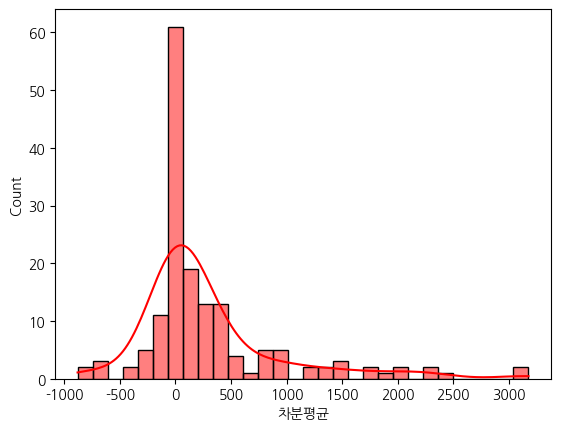

In [282]:
sns.histplot(result,x='차분평균',kde=True,color='red')
plt.show()